# Analyzing Training, Validation, and Testing Sets

Investigation of the dataset for new reflector short tank data

In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import sys
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from exploratory_data_analysis_utils import *

# Load Data From H5

In [4]:
# Import test events from h5 file
data_path = "/scratch/jgao/data/HKHybrid/HKHybrid_e-mu-pi0_E0to1000MeV_unif-pos-R3240-y3287cm_4pi-dir_9Mevts.hdf5"
data_file = h5py.File(data_path, "r")

print(data_file.keys())

hdf5_hit_pmt_20    = data_file["hit_pmt_20"]
hdf5_hit_time_20   = data_file["hit_time_20"]
hdf5_hit_charge_20 = data_file["hit_charge_20"]
hdf5_hit_pmt_3    = data_file["hit_pmt_3"]
hdf5_hit_time_3   = data_file["hit_time_3"]
hdf5_hit_charge_3 = data_file["hit_charge_3"]

hit_pmt_20    = np.memmap(data_path, mode="r", shape=hdf5_hit_pmt_20.shape,
                          offset=hdf5_hit_pmt_20.id.get_offset(), dtype=hdf5_hit_pmt_20.dtype)
hit_time_20   = np.memmap(data_path, mode="r", shape=hdf5_hit_time_20.shape,
                          offset=hdf5_hit_time_20.id.get_offset(), dtype=hdf5_hit_time_20.dtype)
hit_charge_20 = np.memmap(data_path, mode="r", shape=hdf5_hit_charge_20.shape,
                          offset=hdf5_hit_charge_20.id.get_offset(), dtype=hdf5_hit_charge_20.dtype)

hit_pmt_3    = np.memmap(data_path, mode="r", shape=hdf5_hit_pmt_3.shape,
                          offset=hdf5_hit_pmt_3.id.get_offset(), dtype=hdf5_hit_pmt_3.dtype)
hit_time_3   = np.memmap(data_path, mode="r", shape=hdf5_hit_time_3.shape,
                          offset=hdf5_hit_time_3.id.get_offset(), dtype=hdf5_hit_time_3.dtype)
hit_charge_3 = np.memmap(data_path, mode="r", shape=hdf5_hit_charge_3.shape,
                          offset=hdf5_hit_charge_3.id.get_offset(), dtype=hdf5_hit_charge_3.dtype)

angles     = np.array(data_file['angles'])
energies   = np.array(data_file['energies'])
positions  = np.array(data_file['positions'])
labels     = np.array(data_file['labels'])
root_files = np.array(data_file['root_files'])

<KeysViewHDF5 ['angles', 'energies', 'event_hits_index_20', 'event_hits_index_3', 'event_ids', 'hit_charge_20', 'hit_charge_3', 'hit_pmt_20', 'hit_pmt_3', 'hit_time_20', 'hit_time_3', 'labels', 'positions', 'root_files', 'veto', 'veto2']>


In [5]:
events_hit_index_20 = data_file['event_hits_index_20']
events_hit_index_3 = data_file['event_hits_index_3']

# Load Indices

In [6]:
idxs_path = '/scratch/jgao/data/HKHybrid/HKHybrid_e-mu-pi0_E0to1000MeV_unif-pos-R3240-y3287cm_4pi-dir_9Mevts_idxs.npz'
idxs = np.load(idxs_path, allow_pickle=True)

train_idxs = idxs['train_idxs']
val_idxs   = idxs['val_idxs']
test_idxs  = idxs['test_idxs']

# compute and save event radii

In [7]:
# compute and save event radii

radii = np.sqrt(positions[:,0,0]**2 + positions[:,0,1]**2)
print(radii)

np.savez('event_radii.npz', radii=radii)


[2023.5558 3232.8086 1710.4503 ... 2159.49   1241.8623 2861.1545]


In [8]:
radii_data = np.load('event_radii.npz', allow_pickle=True)

radii = radii_data['radii']

# Get indices associated with each dataset and particle type

In [9]:
train_e_idxs = train_idxs[np.where(labels[train_idxs]==1)[0]]
val_e_idxs   = val_idxs[np.where(labels[val_idxs]==1)[0]]
test_e_idxs  = test_idxs[np.where(labels[test_idxs]==1)[0]]
train_mu_idxs = train_idxs[np.where(labels[train_idxs]==2)[0]]
val_mu_idxs   = val_idxs[np.where(labels[val_idxs]==2)[0]]
test_mu_idxs  = test_idxs[np.where(labels[test_idxs]==2)[0]]
train_pi0_idxs = train_idxs[np.where(labels[train_idxs]==3)[0]]
val_pi0_idxs   = val_idxs[np.where(labels[val_idxs]==3)[0]]
test_pi0_idxs  = test_idxs[np.where(labels[test_idxs]==3)[0]]

# Distribution of event energies by dataset and particle type

In [10]:
# get energies
train_e_energies = energies[train_e_idxs]
val_e_energies   = energies[val_e_idxs]
test_e_energies  = energies[test_e_idxs]

e_energies = np.concatenate((train_e_energies, val_e_energies, test_e_energies))

train_mu_energies = energies[train_mu_idxs]
val_mu_energies   = energies[val_mu_idxs]
test_mu_energies  = energies[test_mu_idxs]

mu_energies = np.concatenate((train_mu_energies, val_mu_energies, test_mu_energies))

train_pi0_energies = energies[train_pi0_idxs]
val_pi0_energies   = energies[val_pi0_idxs]
test_pi0_energies  = energies[test_pi0_idxs]

pi0_energies = np.concatenate((train_pi0_energies, val_pi0_energies, test_pi0_energies))

/project/6008045/jgao/WatChMaL_analysis/tts_EDA/exploratory_data_analysis_utils.py:164: RuntimeWarning: invalid value encountered in true_divide
  ns[idx] / ns[denominator_dist_idxs[i]],
/project/6008045/jgao/WatChMaL_analysis/tts_EDA/exploratory_data_analysis_utils.py:164: RuntimeWarning: invalid value encountered in true_divide
  ns[idx] / ns[denominator_dist_idxs[i]],
/project/6008045/jgao/WatChMaL_analysis/tts_EDA/exploratory_data_analysis_utils.py:164: RuntimeWarning: invalid value encountered in true_divide
  ns[idx] / ns[denominator_dist_idxs[i]],
/project/6008045/jgao/WatChMaL_analysis/tts_EDA/exploratory_data_analysis_utils.py:164: RuntimeWarning: invalid value encountered in true_divide
  ns[idx] / ns[denominator_dist_idxs[i]],
/project/6008045/jgao/WatChMaL_analysis/tts_EDA/exploratory_data_analysis_utils.py:164: RuntimeWarning: invalid value encountered in true_divide
  ns[idx] / ns[denominator_dist_idxs[i]],
/project/6008045/jgao/WatChMaL_analysis/tts_EDA/exploratory_data_

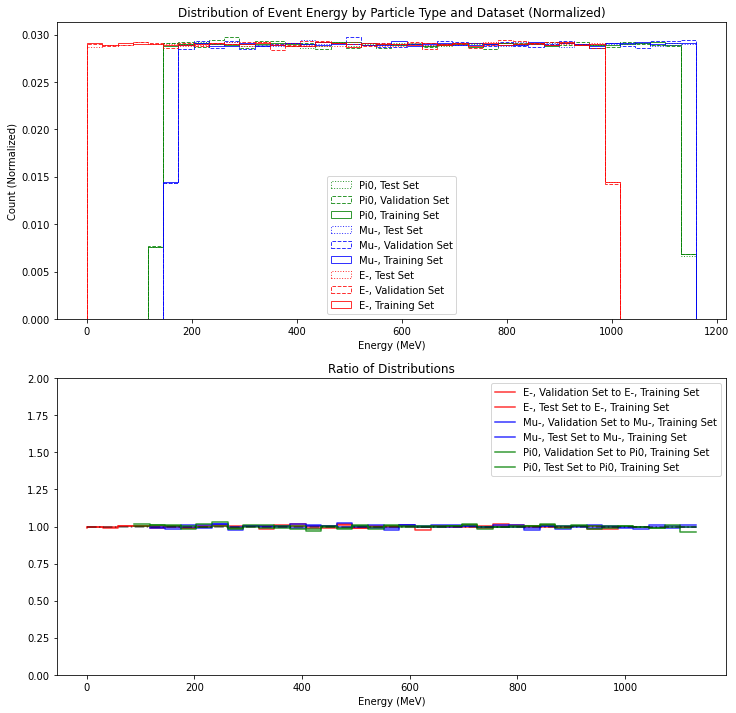

In [16]:
fig = plot_compare_dists([np.squeeze(train_e_energies), np.squeeze(val_e_energies), np.squeeze(test_e_energies), 
                          np.squeeze(train_mu_energies), np.squeeze(val_mu_energies), np.squeeze(test_mu_energies),
                          np.squeeze(train_pi0_energies), np.squeeze(val_pi0_energies), np.squeeze(test_pi0_energies)],
                         numerator_dist_idxs   = [1, 2, 4, 5, 7, 8],
                         denominator_dist_idxs = [0, 0, 3, 3, 6, 6],
                         bins=40,
                         labels=['E-, Training Set', 'E-, Validation Set', 'E-, Test Set',
                                 'Mu-, Training Set', 'Mu-, Validation Set', 'Mu-, Test Set',
                                 'Pi0, Training Set', 'Pi0, Validation Set', 'Pi0, Test Set'],
                         ratio_range=[0,2],
                         title='Distribution of Event Energy by Particle Type and Dataset', 
                         colors =  ['r','r','r','b','b','b','g','g','g'],
                         linestyle=['-','--',':','-','--',':','-','--',':'], 
                         xlabel='Energy (MeV)',
                         loc='lower center'
                        )

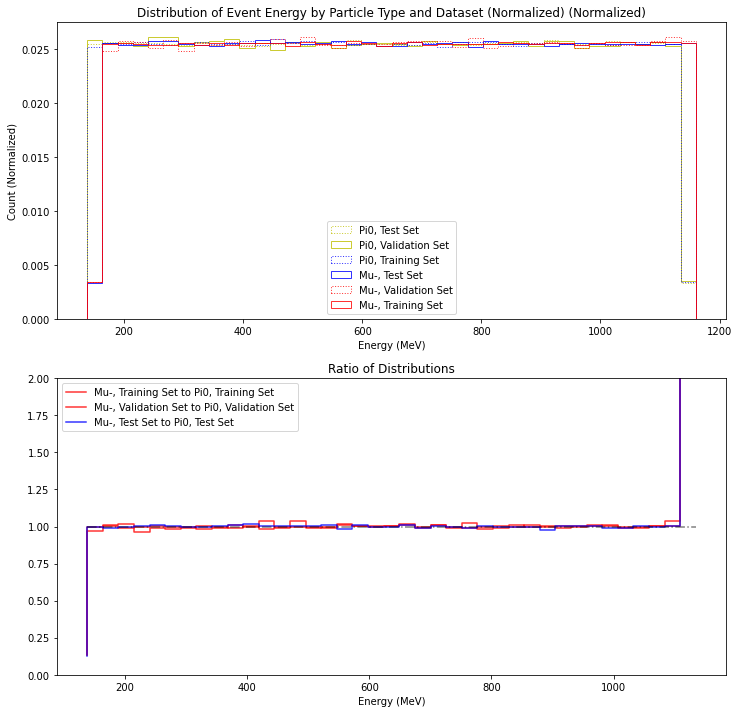

In [18]:
fig = plot_compare_dists([np.squeeze(train_mu_energies), np.squeeze(val_mu_energies), np.squeeze(test_mu_energies),
                          np.squeeze(train_pi0_energies), np.squeeze(val_pi0_energies), np.squeeze(test_pi0_energies)],
                         numerator_dist_idxs   = [0, 1, 2],
                         denominator_dist_idxs = [3, 4, 5],
                         bins=40,
                         labels=['Mu-, Training Set', 'Mu-, Validation Set', 'Mu-, Test Set',
                                 'Pi0, Training Set', 'Pi0, Validation Set', 'Pi0, Test Set'],
                         ratio_range=[0,2],
                         title='Distribution of Event Energy by Particle Type and Dataset (Normalized)', 
                         colors =  ['r','r','b','b','y','y'],
                         linestyle=['-',':','-',':','-',':'], 
                         xlabel='Energy (MeV)',
                         loc='lower center'
                    )

# Distribution of event energies by dataset and particle type relative to threshold

In [11]:
GAMMA_THRESHOLD = 1.55
ELECTRON_THRESHOLD = 0.775
MUON_THRESHOLD = 160.26
PI0_THRESHOLD = 204.76

In [12]:
#shifted_energies = energies - np.choose(labels, [GAMMA_THRESHOLD, ELECTRON_THRESHOLD])
shifted_energies = np.copy(energies)
shifted_energies[labels==1] -= ELECTRON_THRESHOLD
shifted_energies[labels==2] -= MUON_THRESHOLD
shifted_energies[labels==3] -= 4*ELECTRON_THRESHOLD
# shifted_energies[labels==3] -= MUON_THRESHOLD

In [13]:
# get shifted energies
shifted_train_e_energies = shifted_energies[train_e_idxs]
shifted_val_e_energies   = shifted_energies[val_e_idxs]
shifted_test_e_energies  = shifted_energies[test_e_idxs]

shifted_e_energies = np.concatenate((shifted_train_e_energies, shifted_val_e_energies, shifted_test_e_energies))

shifted_train_mu_energies = shifted_energies[train_mu_idxs]
shifted_val_mu_energies   = shifted_energies[val_mu_idxs]
shifted_test_mu_energies  = shifted_energies[test_mu_idxs]

shifted_mu_energies = np.concatenate((shifted_train_mu_energies, shifted_val_mu_energies, shifted_test_mu_energies))

shifted_train_pi0_energies = shifted_energies[train_pi0_idxs]
shifted_val_pi0_energies   = shifted_energies[val_pi0_idxs]
shifted_test_pi0_energies  = shifted_energies[test_pi0_idxs]

shifted_pi0_energies = np.concatenate((shifted_train_pi0_energies, shifted_val_pi0_energies, shifted_test_pi0_energies))

/project/6008045/jgao/WatChMaL_analysis/tts_EDA/exploratory_data_analysis_utils.py:164: RuntimeWarning: invalid value encountered in true_divide
  ns[idx] / ns[denominator_dist_idxs[i]],
/project/6008045/jgao/WatChMaL_analysis/tts_EDA/exploratory_data_analysis_utils.py:164: RuntimeWarning: invalid value encountered in true_divide
  ns[idx] / ns[denominator_dist_idxs[i]],
/project/6008045/jgao/WatChMaL_analysis/tts_EDA/exploratory_data_analysis_utils.py:164: RuntimeWarning: invalid value encountered in true_divide
  ns[idx] / ns[denominator_dist_idxs[i]],
/project/6008045/jgao/WatChMaL_analysis/tts_EDA/exploratory_data_analysis_utils.py:164: RuntimeWarning: invalid value encountered in true_divide
  ns[idx] / ns[denominator_dist_idxs[i]],
/project/6008045/jgao/WatChMaL_analysis/tts_EDA/exploratory_data_analysis_utils.py:164: RuntimeWarning: invalid value encountered in true_divide
  ns[idx] / ns[denominator_dist_idxs[i]],
/project/6008045/jgao/WatChMaL_analysis/tts_EDA/exploratory_data_

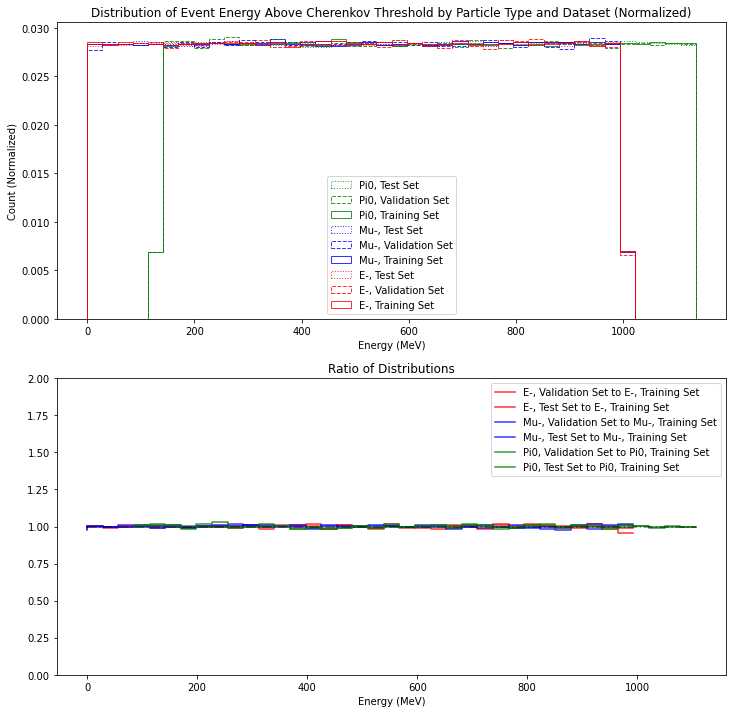

In [14]:
fig = plot_compare_dists([np.squeeze(shifted_train_e_energies), np.squeeze(shifted_val_e_energies), np.squeeze(shifted_test_e_energies), 
                          np.squeeze(shifted_train_mu_energies), np.squeeze(shifted_val_mu_energies), np.squeeze(shifted_test_mu_energies),
                          np.squeeze(shifted_train_pi0_energies), np.squeeze(shifted_val_pi0_energies), np.squeeze(shifted_test_pi0_energies)],
                          numerator_dist_idxs   = [1, 2, 4, 5, 7, 8],
                          denominator_dist_idxs = [0, 0, 3, 3, 6, 6],
                          bins=40,
                          labels=['E-, Training Set', 'E-, Validation Set', 'E-, Test Set',
                                  'Mu-, Training Set', 'Mu-, Validation Set', 'Mu-, Test Set',
                                  'Pi0, Training Set', 'Pi0, Validation Set', 'Pi0, Test Set'],
                          ratio_range=[0,2],
                          title='Distribution of Event Energy Above Cherenkov Threshold by Particle Type and Dataset',
                          colors=['r','r','r','b','b','b','g','g','g'],
                          linestyle=['-','--',':','-','--',':','-','--',':'], xlabel='Energy (MeV)',
                          loc='lower center'
                    )

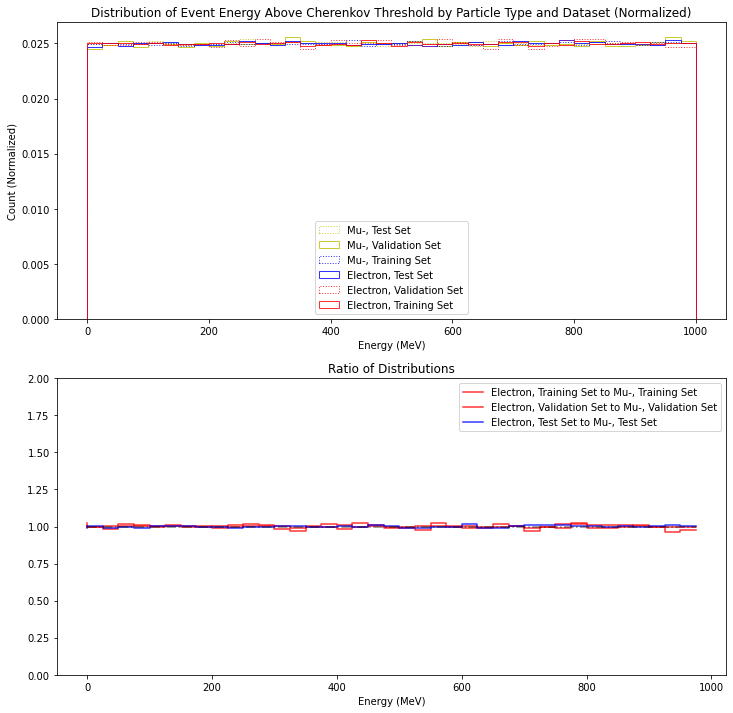

In [43]:
fig = plot_compare_dists([np.squeeze(shifted_train_e_energies), np.squeeze(shifted_val_e_energies), np.squeeze(shifted_test_e_energies), 
                          np.squeeze(shifted_train_mu_energies), np.squeeze(shifted_val_mu_energies), np.squeeze(shifted_test_mu_energies)],
                          numerator_dist_idxs   = [0, 1, 2],
                          denominator_dist_idxs = [3, 4, 5],
                          bins=40,
                          labels=['Electron, Training Set', 'Electron, Validation Set', 'Electron, Test Set',
                                  'Mu-, Training Set', 'Mu-, Validation Set', 'Mu-, Test Set'],
                          ratio_range=[0,2],
                          title='Distribution of Event Energy Above Cherenkov Threshold by Particle Type and Dataset',
                          colors=['r','r','b','b','y','y'],
                          linestyle=['-',':','-',':','-',':'], xlabel='Energy (MeV)',
                          loc='lower center'
                    )

# Distribution of event departure angles

In [15]:
splits = {
    'E-, Train Set': train_e_idxs,
    'E-, Validation Set': val_e_idxs,
    'E-, Test Set': test_e_idxs,
    'Mu-, Train Set': train_mu_idxs,
    'Mu-, Validation Set': val_mu_idxs
#     'Mu-, Test Set': test_mu_idxs,
#     'Pi0, Train Set': train_pi0_idxs,
#     'Pi0, Validation Set': val_pi0_idxs,
#     'Pi0, Test Set': test_pi0_idxs,
}

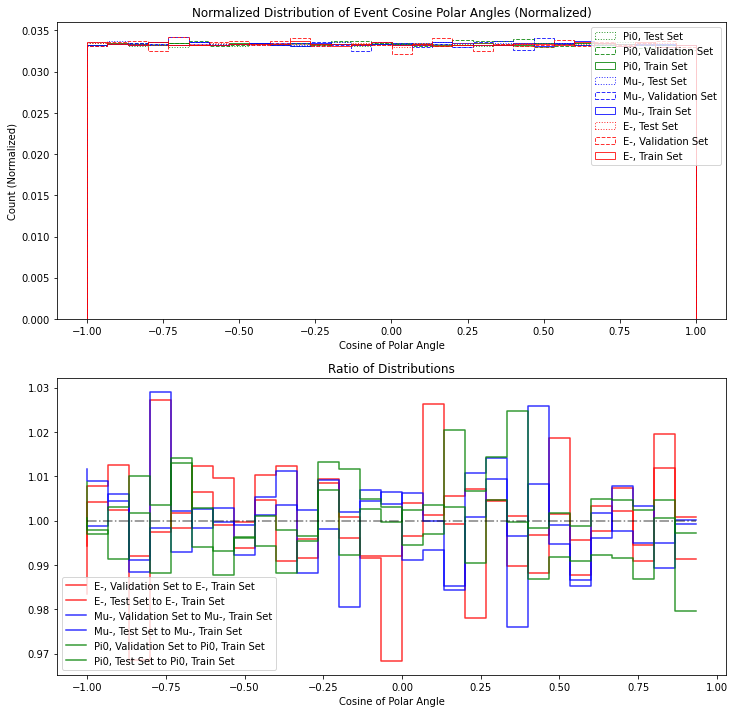

In [45]:
fig = plot_compare_dists([np.cos(angles[s,0]) for s in splits.values()],
                         [1,2,4,5,7,8],
                         [0,0,3,3,6,6],
                         list(splits.keys()),
                         bins=30,
                         title='Normalized Distribution of Event Cosine Polar Angles',
                         xlabel='Cosine of Polar Angle',
                         colors=['r','r','r','b','b','b','g','g','g'],
                         linestyle=['-','--',':','-','--',':','-','--',':'])

ValueError: The 'color' keyword argument must have one color per dataset, but 9 datasets and 6 colors were provided

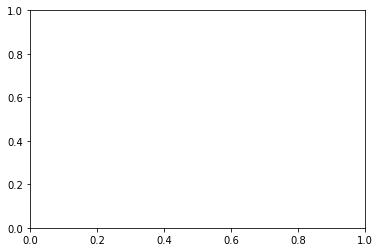

In [46]:
fig = plot_compare_dists([np.cos(angles[s,0]) for s in splits.values()],
                         [0,1,2],
                         [3,4,5],
                         list(splits.keys()),
                         bins=30,
                         title='Normalized Distribution of Event Cosine Polar Angles',
                         xlabel='Cosine Polar Angle',
                         colors=['r','r','b','b','y','y'],
                         linestyle=['-',':','-',':','-',':'])

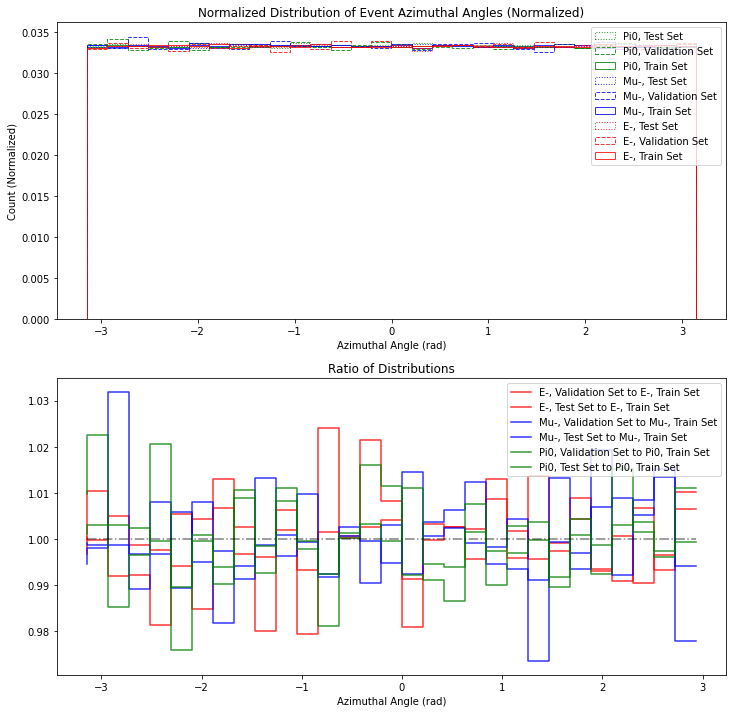

In [47]:
fig = plot_compare_dists([angles[s,1] for s in splits.values()],
                         [1,2,4,5,7,8],
                         [0,0,3,3,6,6],
                         list(splits.keys()),
                         bins=30,
                         title='Normalized Distribution of Event Azimuthal Angles',
                         xlabel='Azimuthal Angle (rad)',
                         colors=['r','r','r','b','b','b','g','g','g'],
                         linestyle=['-','--',':','-','--',':','-','--',':'])

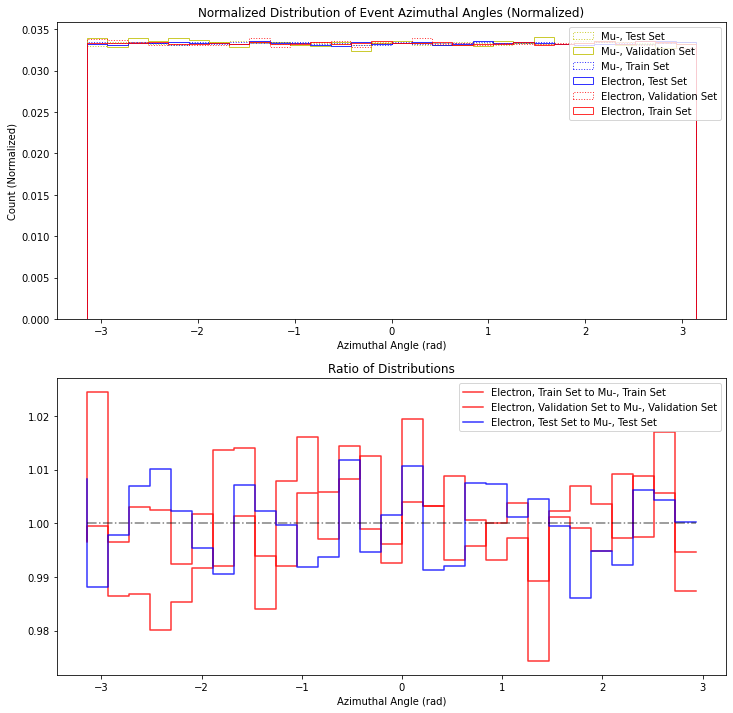

In [58]:
fig = plot_compare_dists([angles[s,1] for s in splits.values()],
                         [0,1,2],
                         [3,4,5],
                         list(splits.keys()),
                         bins=30,
                         title='Normalized Distribution of Event Azimuthal Angles',
                         xlabel='Azimuthal Angle (rad)',
                         colors=['r','r','b','b','y','y'],
                         linestyle=['-',':','-',':','-',':'])

<Figure size 432x288 with 0 Axes>

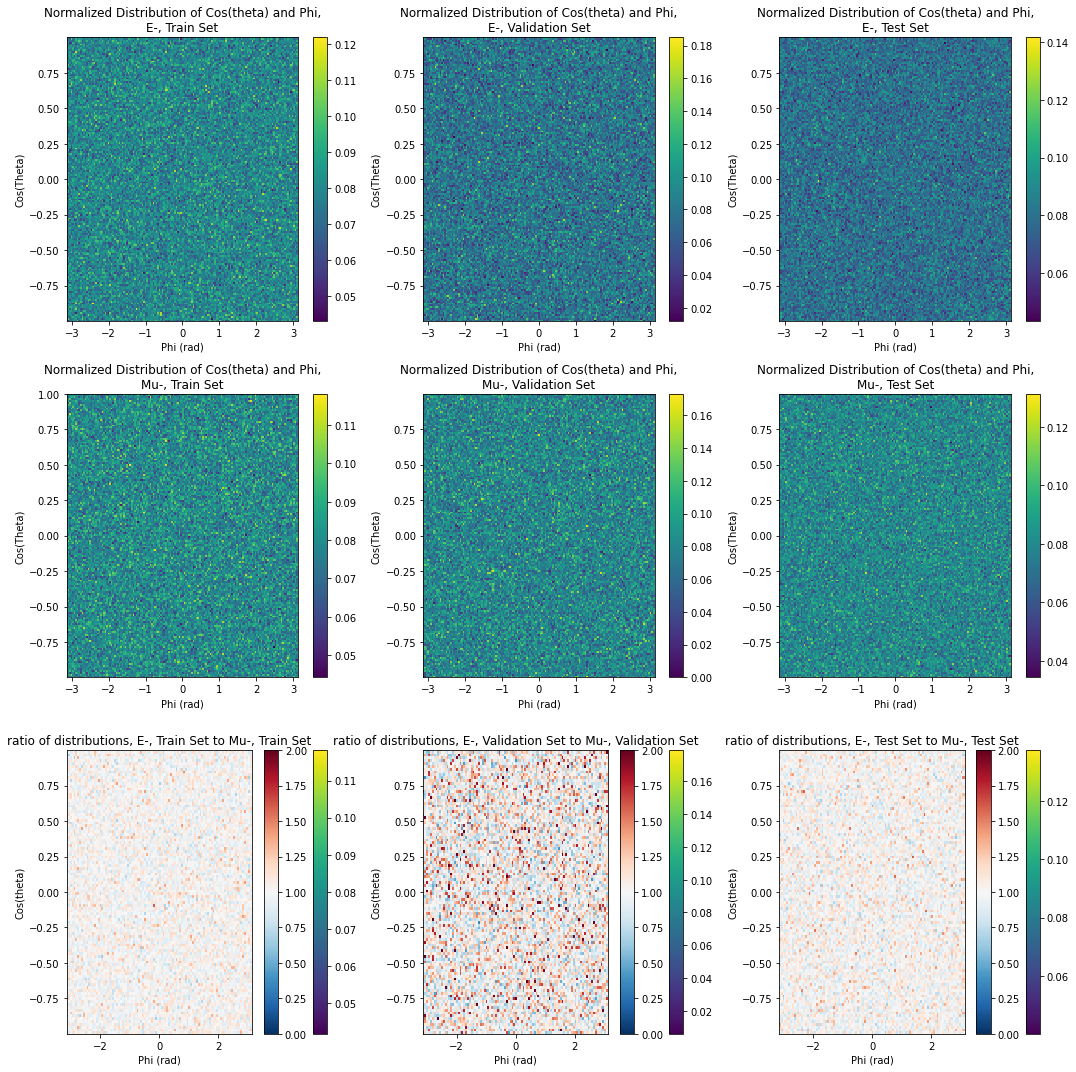

In [48]:
plt.figure()
fig,axes = plt.subplots(3,3,figsize=(15,15))
axes = axes.flatten()

for i, (k, s) in enumerate(splits.items()):
    ax = axes[i]
    mat,_,_,im = ax.hist2d(angles[s,1], np.cos(angles[s,0]),[150,150],density=True)
    fig.colorbar(im,ax=ax)
    ax.set_title('Normalized Distribution of Cos(theta) and Phi,\n{}'.format(k))
    ax.set_ylabel('Cos(Theta)')
    ax.set_xlabel('Phi (rad)')
for i, ((k1, s1), (k2,s2)) in enumerate(zip(list(splits.items())[:3], list(splits.items())[3:])):
    fig = plot_2d_ratio(angles[s1,1], np.cos(angles[s1,0]),
                        angles[s2,1], np.cos(angles[s2,0]),bins=(100,100),
                        title=f"ratio of distributions, {k1} to {k2}",
                        ylabel='Cos(theta)',xlabel='Phi (rad)',
                        fig=fig, ax=axes[6+i],ratio_range=[0,2])
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

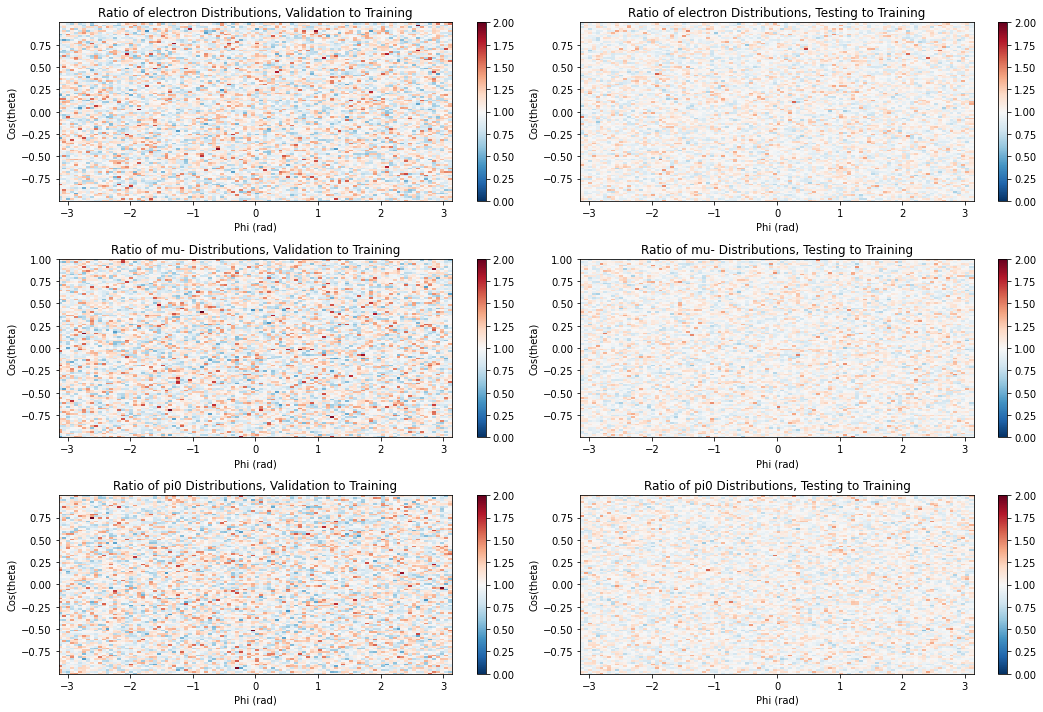

In [30]:
plt.figure()
fig,axes = plt.subplots(3,2,figsize=(15,10))
axes = axes.flatten()

fig = plot_2d_ratio(angles[val_e_idxs,1], np.cos(angles[val_e_idxs,0]),
                    angles[train_e_idxs,1], np.cos(angles[train_e_idxs,0]),bins=(100,100),
                    title='Ratio of electron Distributions, Validation to Training',
                    ylabel='Cos(theta)',xlabel='Phi (rad)',
                    fig=fig, ax=axes[0],ratio_range=[0,2])
fig = plot_2d_ratio(angles[test_e_idxs,1], np.cos(angles[test_e_idxs,0]),
                    angles[train_e_idxs,1], np.cos(angles[train_e_idxs,0]),bins=(100,100),
                    title='Ratio of electron Distributions, Testing to Training',ylabel='Cos(theta)',xlabel='Phi (rad)',
                    fig=fig, ax=axes[1],ratio_range=[0,2])

fig = plot_2d_ratio(angles[val_mu_idxs,1], np.cos(angles[val_mu_idxs,0]),
                    angles[train_mu_idxs,1], np.cos(angles[train_mu_idxs,0]),bins=(100,100),
                    title='Ratio of mu- Distributions, Validation to Training',
                    ylabel='Cos(theta)',xlabel='Phi (rad)',
                    fig=fig, ax=axes[2],ratio_range=[0,2])
fig = plot_2d_ratio(angles[test_mu_idxs,1], np.cos(angles[test_mu_idxs,0]),
                    angles[train_mu_idxs,1], np.cos(angles[train_mu_idxs,0]),bins=(100,100),
                    title='Ratio of mu- Distributions, Testing to Training',ylabel='Cos(theta)',xlabel='Phi (rad)',
                    fig=fig, ax=axes[3],ratio_range=[0,2])

fig = plot_2d_ratio(angles[val_pi0_idxs,1], np.cos(angles[val_pi0_idxs,0]),
                    angles[train_pi0_idxs,1], np.cos(angles[train_pi0_idxs,0]),bins=(100,100),
                    title='Ratio of pi0 Distributions, Validation to Training',
                    ylabel='Cos(theta)',xlabel='Phi (rad)',
                    fig=fig, ax=axes[4],ratio_range=[0,2])
fig = plot_2d_ratio(angles[test_pi0_idxs,1], np.cos(angles[test_pi0_idxs,0]),
                    angles[train_pi0_idxs,1], np.cos(angles[train_pi0_idxs,0]),bins=(100,100),
                    title='Ratio of pi0 Distributions, Testing to Training',ylabel='Cos(theta)',xlabel='Phi (rad)',
                    fig=fig, ax=axes[5],ratio_range=[0,2])

plt.tight_layout()
plt.show()

# Distribution of events throughout the detector volume

<Figure size 432x288 with 0 Axes>

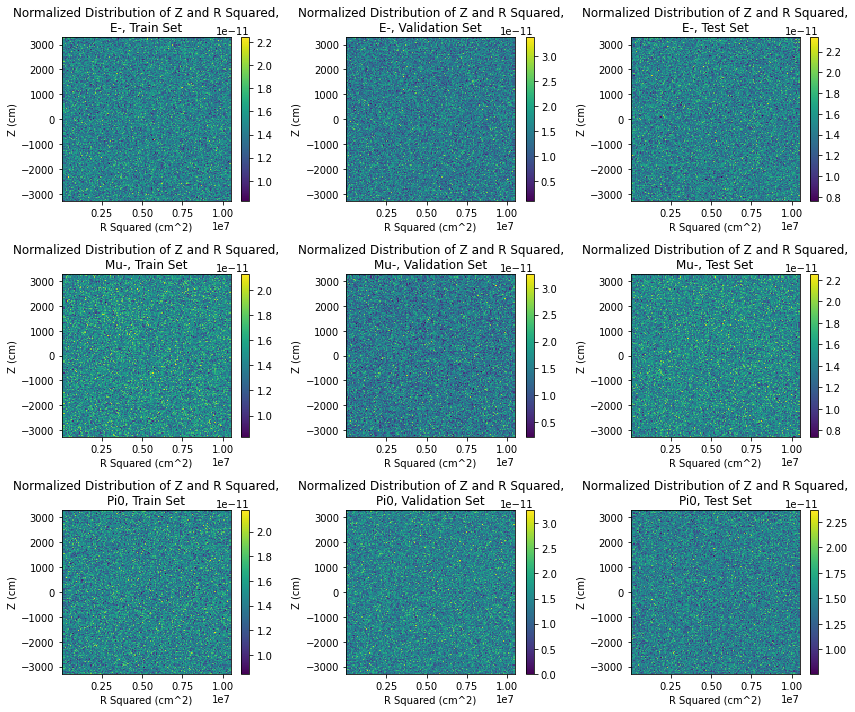

In [22]:
plt.figure()
fig,axes = plt.subplots(3,3,figsize=(12,10))

bins=(150,150)
for ax, (k, s) in zip(axes.flatten(), splits.items()):
    mat,_,_,im = ax.hist2d(radii[s]**2,positions[s,0,2],bins,density=True)
    fig.colorbar(im,ax=ax)
    ax.set_title('Normalized Distribution of Z and R Squared,\n{}'.format(k))
    ax.set_ylabel('Z (cm)')
    ax.set_xlabel('R Squared (cm^2)')
    
plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'pcolormesh'

<Figure size 432x288 with 0 Axes>

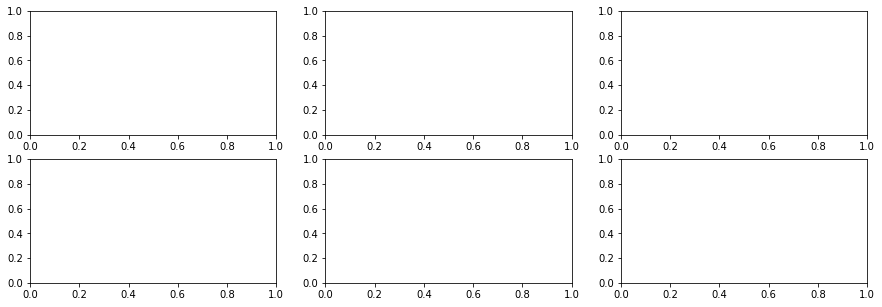

In [26]:
plt.figure()
fig,axes = plt.subplots(2,3,figsize=(15,5))

bins=(150,150)
for i, ((k1, s1), (k2,s2)) in enumerate(zip(list(splits.items())[:3], list(splits.items())[3:])):
    fig = plot_2d_ratio(radii[s1]**2, positions[s1,0,2],
                        radii[s2]**2, positions[s2,0,2],bins=(100,100),
                        title=f"ratio of distributions, {k1} to {k2}",
                        ylabel='Z (cm)',xlabel='R Squared (cm^2)',
                        fig=fig, ax=axes[i],ratio_range=[0,2])
    
plt.tight_layout()
plt.show()

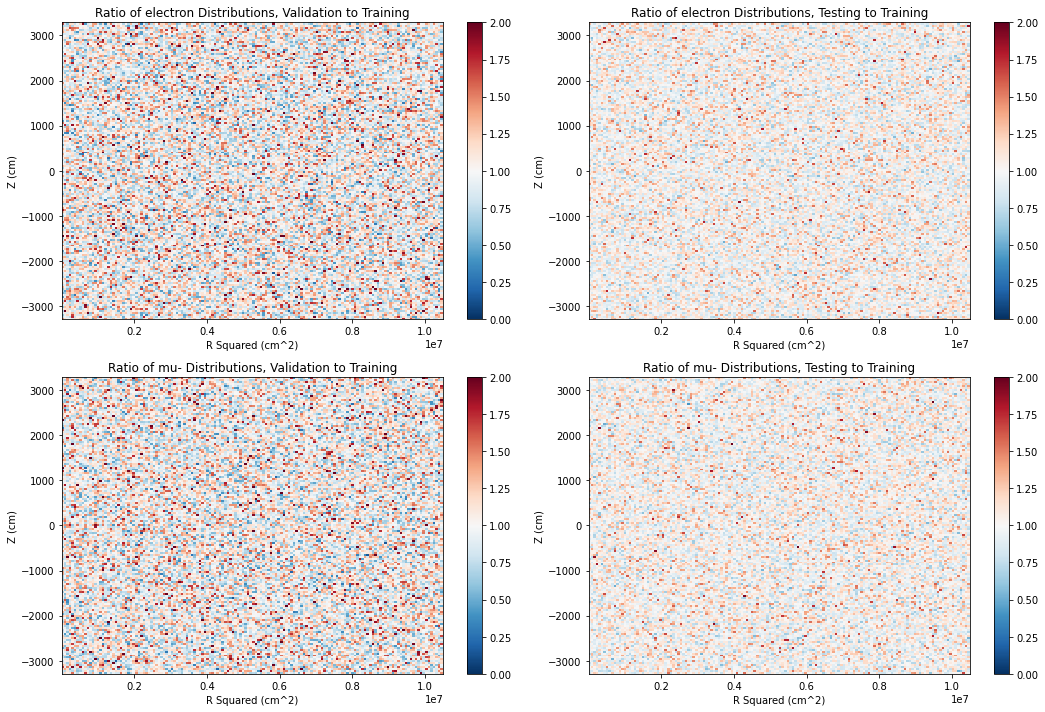

In [27]:
fig,axes = plt.subplots(2,2,figsize=(15,10))

bins=(150,150)
fig = plot_2d_ratio(radii[val_e_idxs]**2, positions[val_e_idxs,0,2],
                    radii[train_e_idxs]**2, positions[train_e_idxs,0,2],
                    bins=bins,
                    title='Ratio of electron Distributions, Validation to Training',xlabel='R Squared (cm^2)',ylabel='Z (cm)',
                    fig=fig, ax=axes[0,0],ratio_range=[0,2])

fig = plot_2d_ratio(radii[test_e_idxs]**2, positions[test_e_idxs,0,2],
                    radii[train_e_idxs]**2, positions[train_e_idxs,0,2],
                    bins=bins,
                    title='Ratio of electron Distributions, Testing to Training',xlabel='R Squared (cm^2)',ylabel='Z (cm)',
                    fig=fig, ax=axes[0,1],ratio_range=[0,2])

fig = plot_2d_ratio(radii[val_mu_idxs]**2, positions[val_mu_idxs,0,2],
                    radii[train_mu_idxs]**2, positions[train_mu_idxs,0,2],
                    bins=bins,
                    title='Ratio of mu- Distributions, Validation to Training',xlabel='R Squared (cm^2)',ylabel='Z (cm)',
                    fig=fig, ax=axes[1,0],ratio_range=[0,2])

fig = plot_2d_ratio(radii[test_mu_idxs]**2, positions[test_mu_idxs,0,2],
                    radii[train_mu_idxs]**2, positions[train_mu_idxs,0,2],
                    bins=bins,
                    title='Ratio of mu- Distributions, Testing to Training',xlabel='R Squared (cm^2)',ylabel='Z (cm)',
                    fig=fig, ax=axes[1,1],ratio_range=[0,2])

plt.tight_layout()